# Medical Insurance Dataset EDA


About Dataset(As per Kaggle):
This dataset contains medical insurance cost information for 1338 individuals. It includes demographic and health-related variables such as age, sex, BMI, number of children, smoking status, and residential region in the US. The target variable is charges, which represents the medical insurance cost billed to the individual.

The dataset is commonly used for:
- Regression modeling
- Health economics research
- Insurance pricing analysis
- Machine learning education and tutorials

Columns

age: Age of primary beneficiary (int)

sex: Gender of beneficiary (male, female)

bmi: Body Mass Index, a measure of body fat based on height and weight (float)

children: Number of children covered by health insurance (int)

smoker: Smoking status of the beneficiary (yes, no)

region: Residential region in the US (northeast, northwest, southeast, southwest)

charges: Medical insurance cost billed to the beneficiary (float)

Potential Uses

Build predictive models for medical costs
Explore how smoking and BMI impact charges
Teach students about regression and feature engineering
Analyze healthcare affordability trends

______________________________________________________________________

### **Target Variable: Charges**
______________________________________________________________________

### **Goal: To perform analysis and train optimal linear regression model on the insurance dataset for the target variable 'Charges'**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
import sys
from pathlib import Path

# add project root / src to path
project_root = Path().resolve().parent
sys.path.append(str(project_root / "src"))


In [4]:
import data_loader as dl

df = dl.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

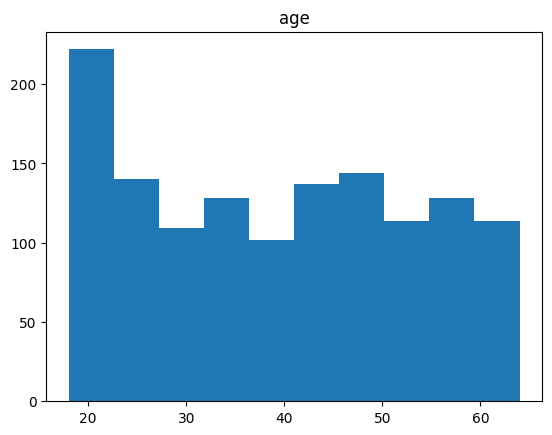

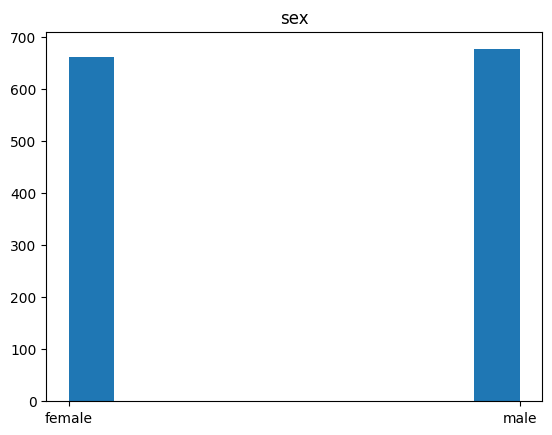

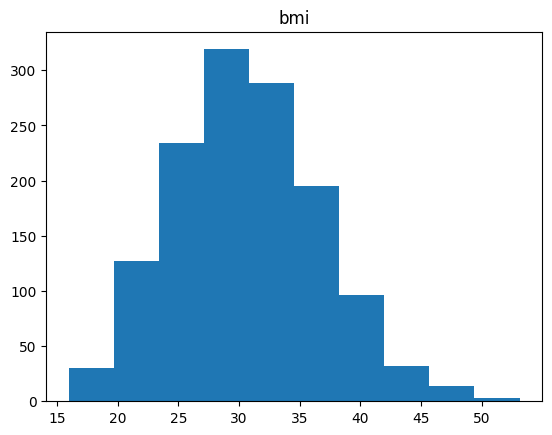

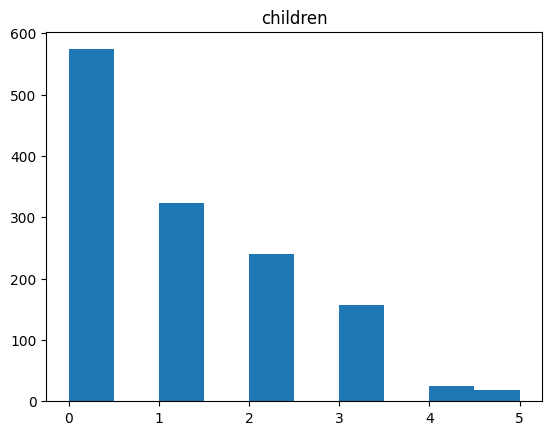

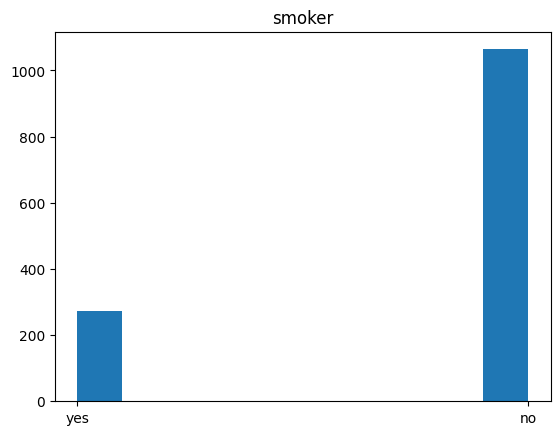

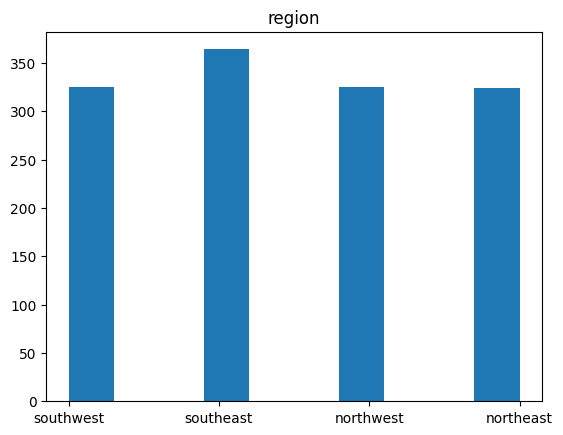

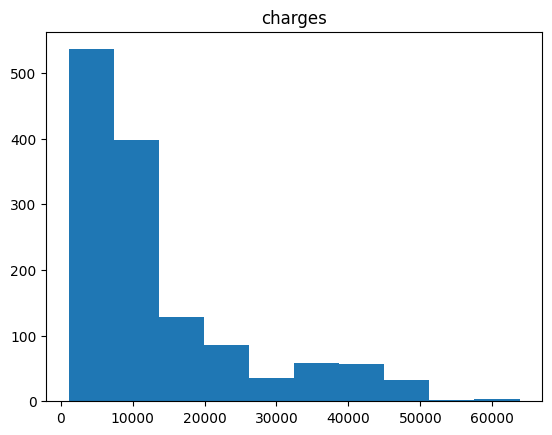

In [8]:
# no null values
# now plotting the graphs for each columns
cols = df.columns
for col in cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

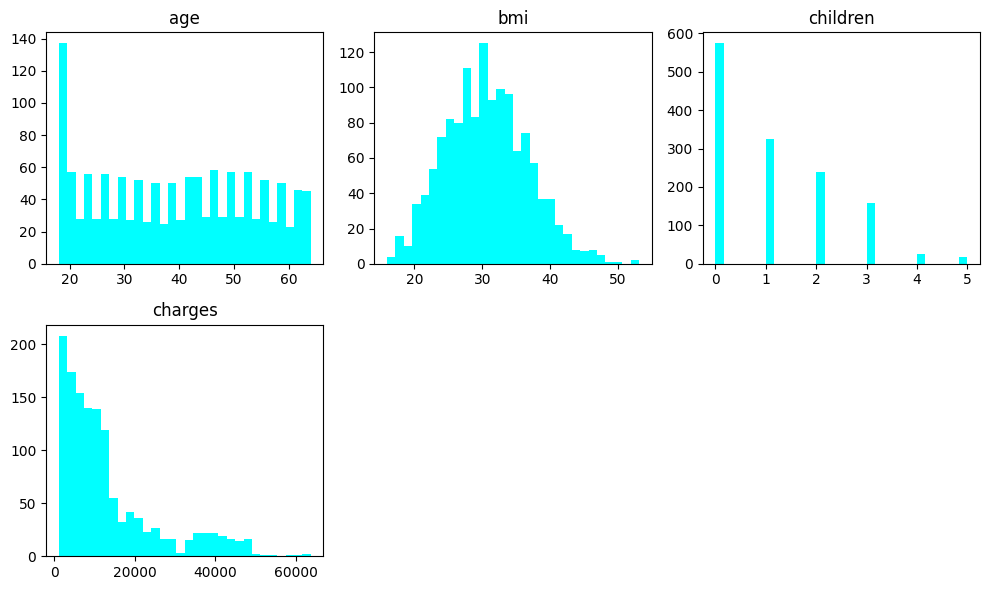

In [9]:
import math
num_cols = df.select_dtypes(include="number").columns
n = len(num_cols)

rows = math.ceil(n / 2)   # 2 plots per row
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
axes = axes.flatten()  # make indexing easy

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=30,color='cyan')
    axes[i].set_title(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

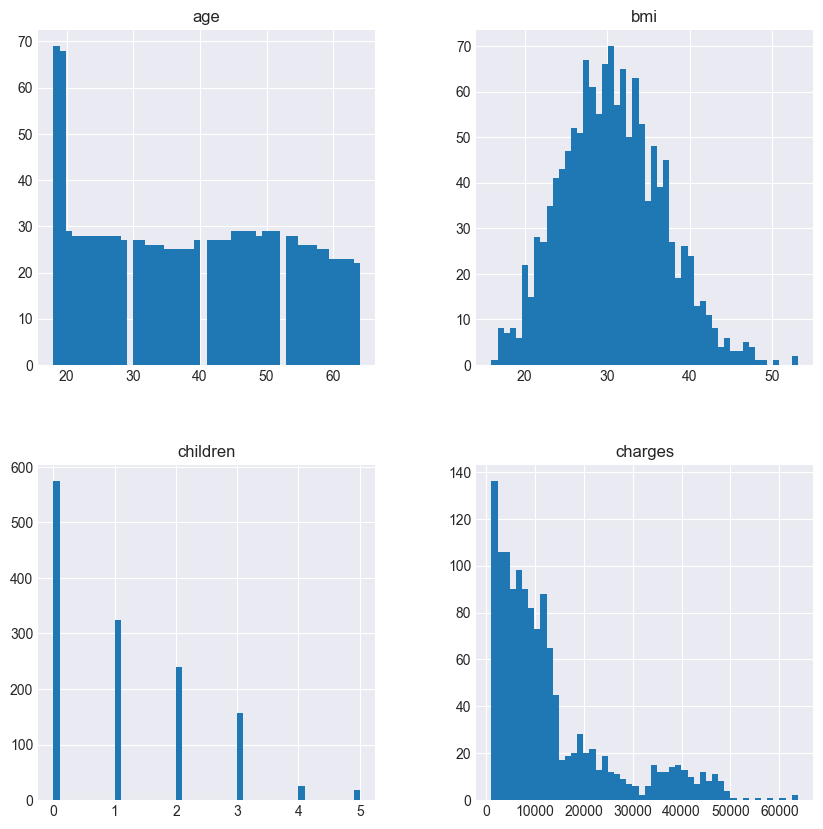

In [10]:
plt.style.use('seaborn-v0_8-darkgrid')
df.hist(bins=50,figsize=(10,10))

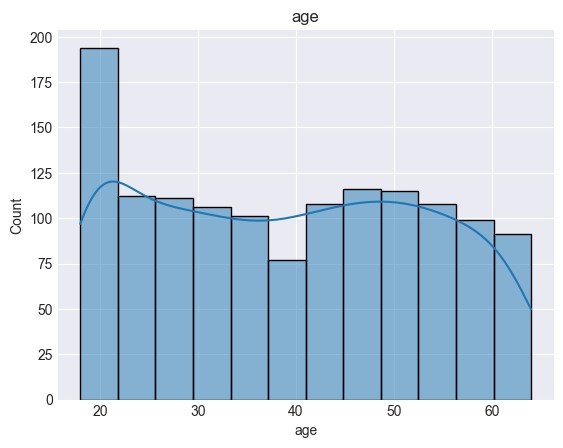

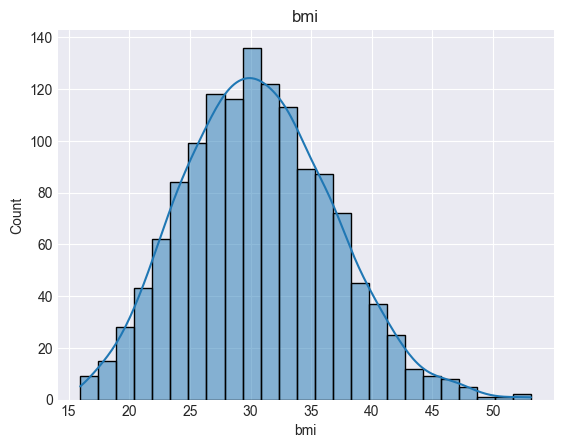

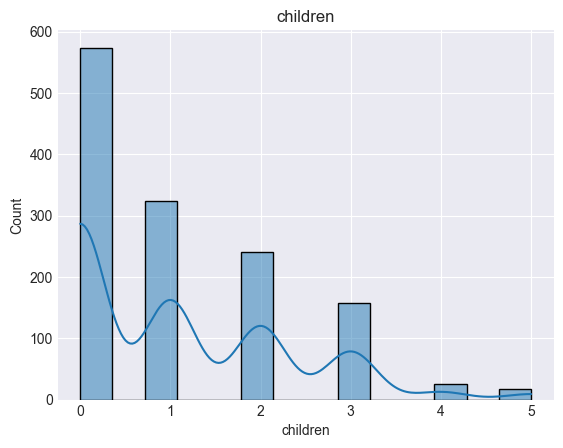

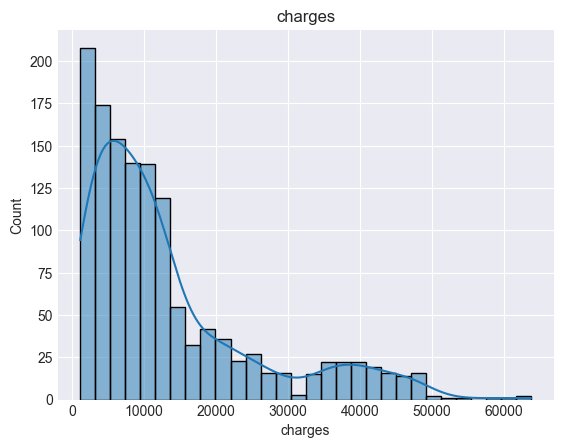

In [11]:
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    sns.histplot(df[col],kde=True)
    plt.title(col)
    plt.show()

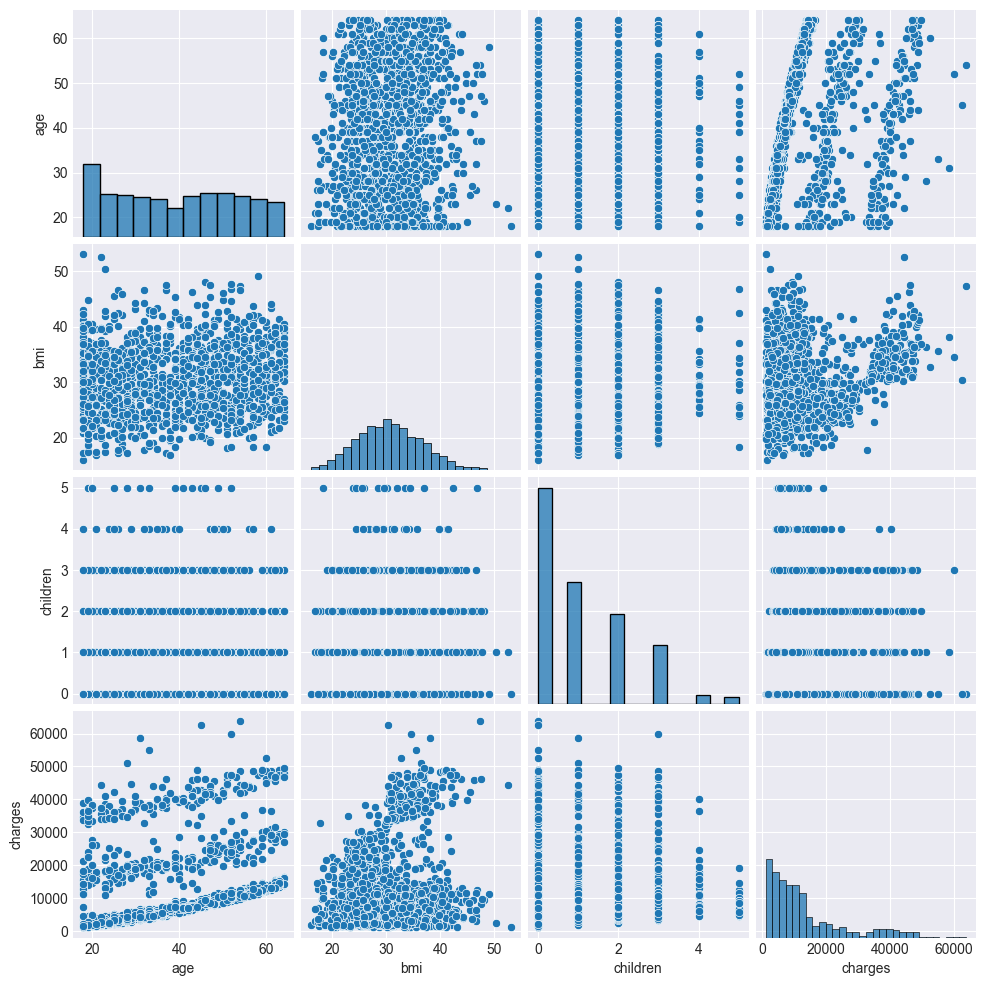

In [12]:
sns.pairplot(df)

In [13]:
pd.crosstab(df['region'], df['charges'])


charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
region,,,,,,,,,,,,,,,,,,,,,
northeast,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
northwest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
southeast,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,1,1
southwest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


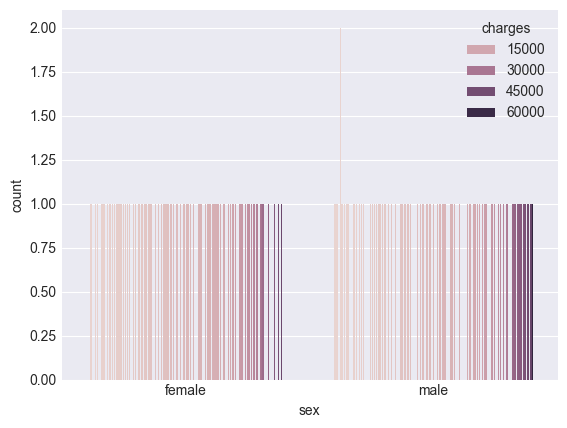

In [14]:
sns.countplot(x='sex', hue='charges', data=df)
plt.show()

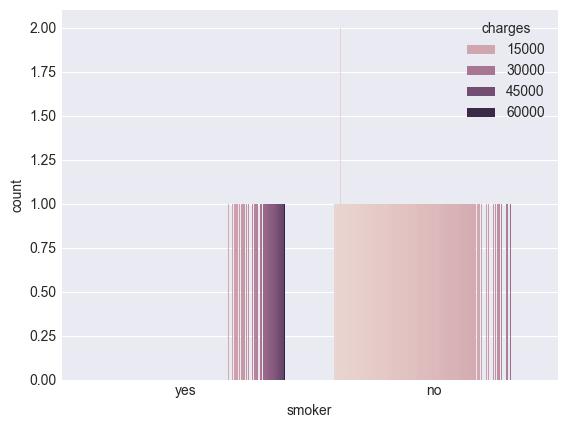

In [15]:
sns.countplot(x='smoker', hue='charges', data=df)
plt.show()

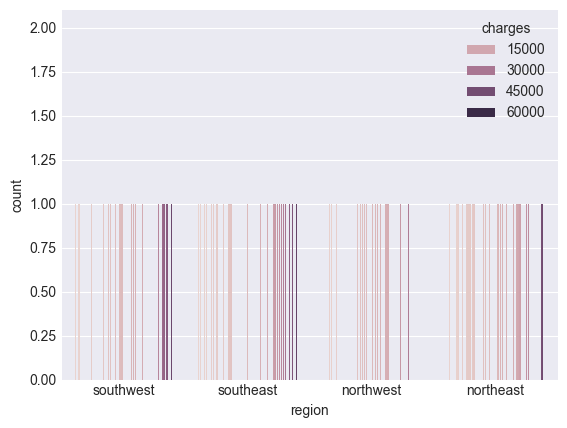

In [16]:
sns.countplot(x='region', hue='charges', data=df)
plt.show()

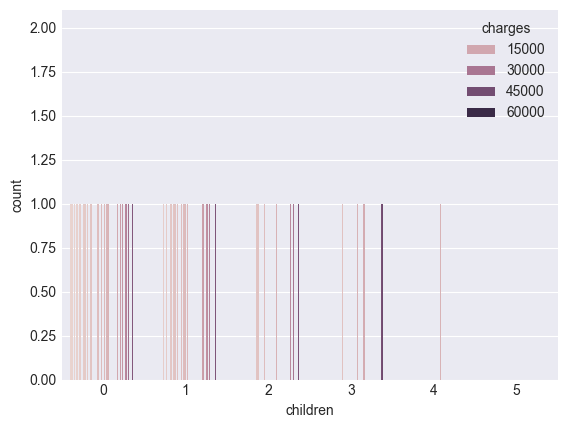

In [17]:
sns.countplot(x='children', hue='charges', data=df)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
# now we try to see how the non numeric data type
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [20]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [21]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
# df.corr()
df.corr(numeric_only=True)


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

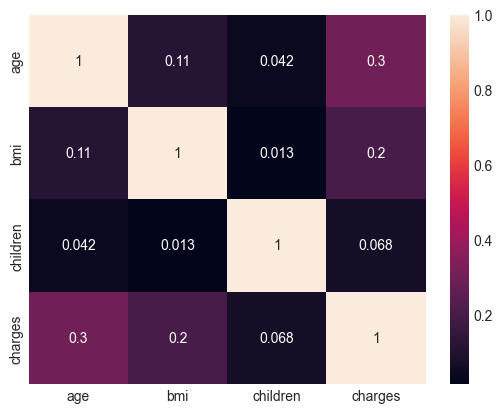

In [24]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

as we can see the smoker directly affects the charges with a 0.79 corr

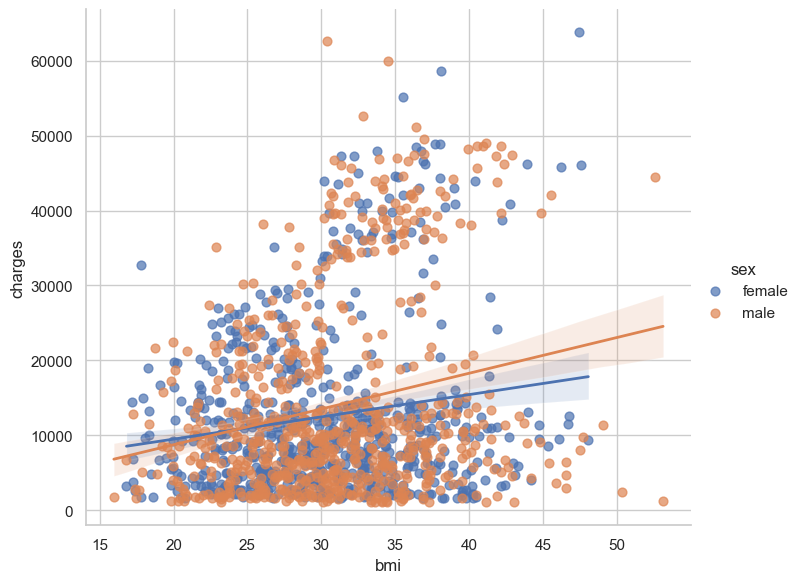

In [25]:
sns.set(style="whitegrid")

sns.lmplot(
    data=df,
    x="bmi",
    y="charges",
    hue="sex",
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.7, "s": 40},
    line_kws={"linewidth": 2}
)

plt.show()

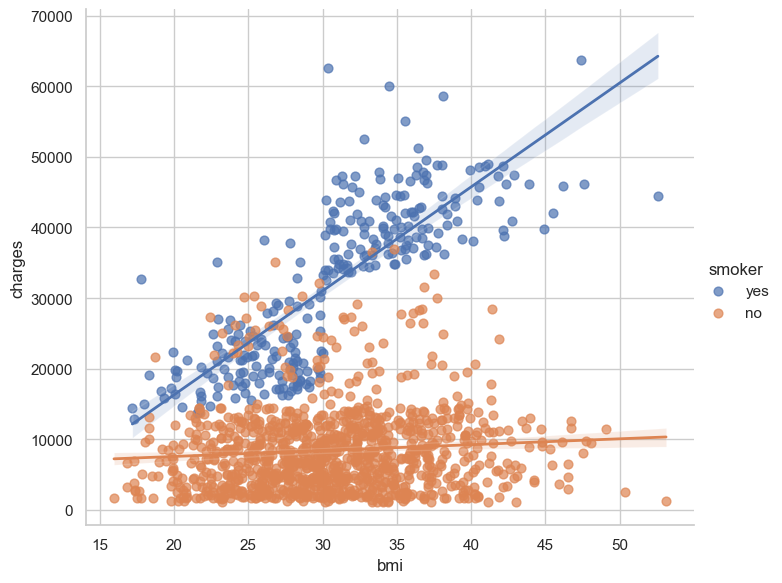

In [26]:
sns.set(style="whitegrid")

sns.lmplot(
    data=df,
    x="bmi",
    y="charges",
    hue="smoker",
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.7, "s": 40},
    line_kws={"linewidth": 2}
)

plt.show()

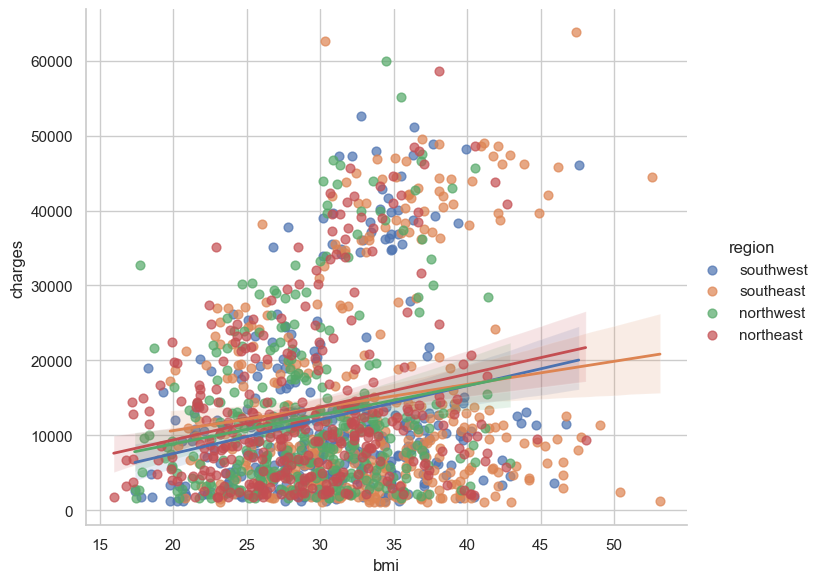

In [27]:
sns.set(style="whitegrid")

sns.lmplot(
    data=df,
    x="bmi",
    y="charges",
    hue="region",
    height=6,
    aspect=1.2,
    scatter_kws={"alpha": 0.7, "s": 40},
    line_kws={"linewidth": 2}
)

plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
# no as such outliers found still just to be sure:
# using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric features
X = df.select_dtypes(include=['float64', 'int64'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Feature       VIF
0       age  8.098132
1       bmi  8.044400
2  children  1.800015
3   charges  2.473524


Interpretation:
- VIF = 1 -+ No correlation
- VIF > 5 -+ Moderate correlation
- VIF > 10-4 High correlation (problematic)

In [30]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
import preprocessing as prp

In [39]:
target_col = 'charges'
df_dropped,df_cleaned = prp.outlier_cleaning(target_col, df)

5-number summary for features:
      age       bmi  children
min  18.0  15.96000       0.0
25%  27.0  26.29625       0.0
50%  39.0  30.40000       1.0
75%  51.0  34.69375       2.0
max  64.0  53.13000       5.0 

Dropped rows (outliers):
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


Well we can drop this much (9) rows of data


In [40]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   object 
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   object 
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


To see the association of the other binary non numeric columns i will be mapping them to 0 and 1

In [42]:
df_cleaned['smoker'].unique()[0]

'yes'

In [43]:
# since we only have 2 binary columns we will be mapping them:
# import preprocessing as prp
binary_cols = ['sex','smoker']
df_cleaned = prp.binary_mapping(df_cleaned, binary_cols)

df_cleaned.head()

C:\xtra\Last_Chance\ML_Projects\insurance_price_prediction\src\preprocessing.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(mapping)
C:\xtra\Last_Chance\ML_Projects\insurance_price_prediction\src\preprocessing.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(mapping)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


In [44]:
df_cleaned.corr(numeric_only=True)

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.019143,0.114686,0.043041,0.024505,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,-0.079854,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,0.002871,0.193196
children,0.043041,0.019281,0.017355,1.000000,-0.007577,0.069739
smoker,0.024505,-0.079854,0.002871,-0.007577,1.000000,-0.785912
charges,0.302022,0.063394,0.193196,0.069739,-0.785912,1.000000


<Axes: >

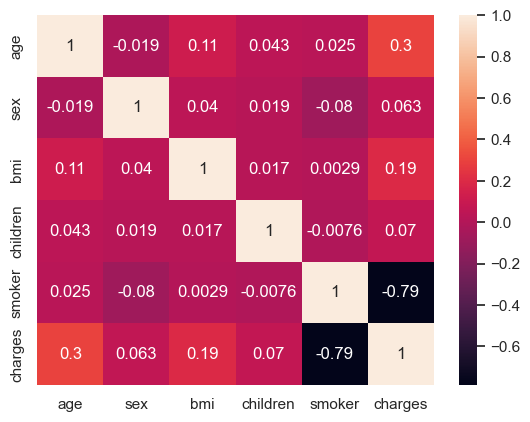

In [45]:
sns.heatmap(df_cleaned.corr(numeric_only=True),annot=True)

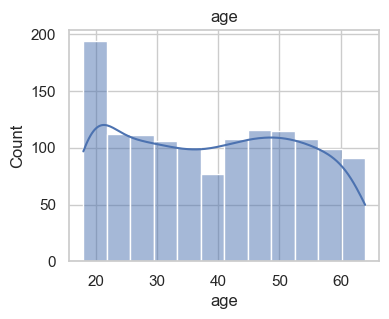

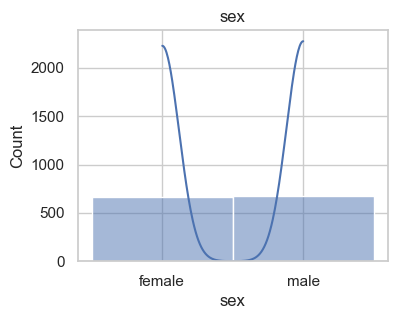

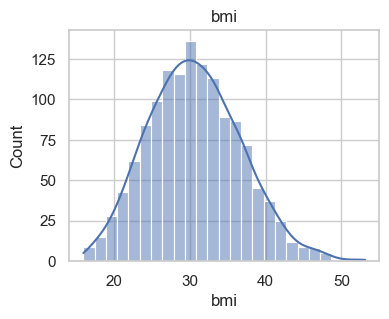

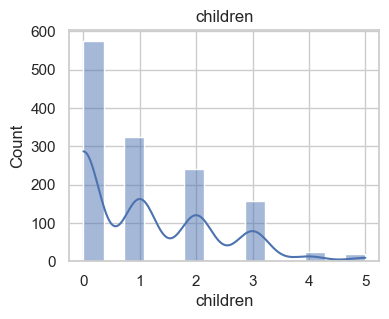

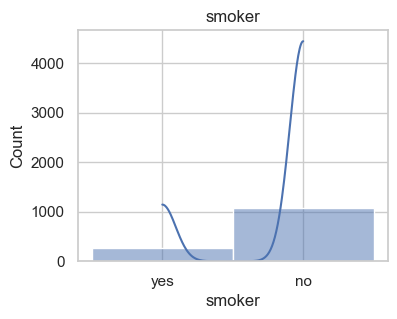

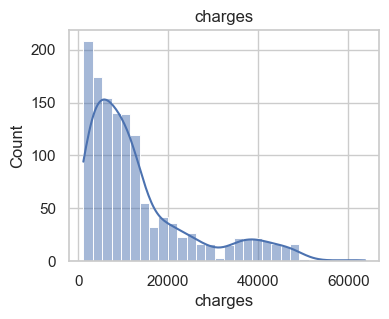

In [46]:
num_cols = df_cleaned.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [47]:
cat_cols = df.select_dtypes(exclude='number').columns
for col in cat_cols:
    print(f"\n{col}")
    print(df[col].value_counts())



sex
sex
male      676
female    662
Name: count, dtype: int64

smoker
smoker
no     1064
yes     274
Name: count, dtype: int64

region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


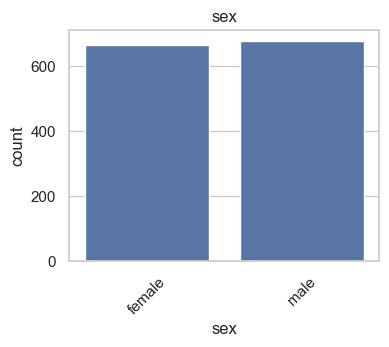

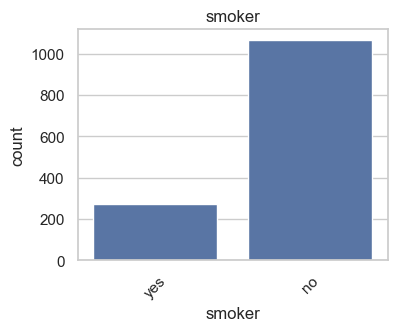

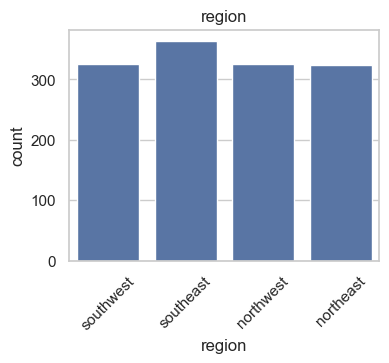

In [48]:
for col in cat_cols:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


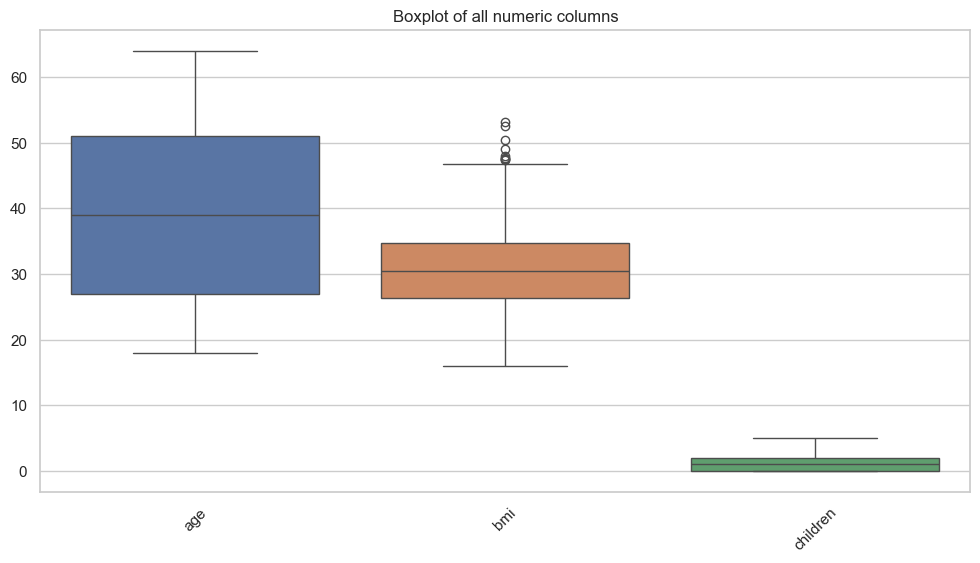

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols].drop(['charges'],axis=1))
plt.xticks(rotation=45)  # rotate labels if needed
plt.title("Boxplot of all numeric columns")
plt.show()

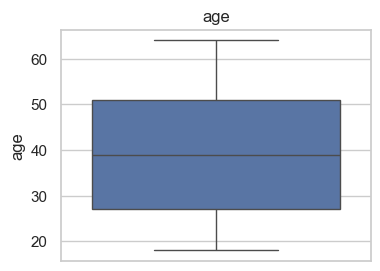

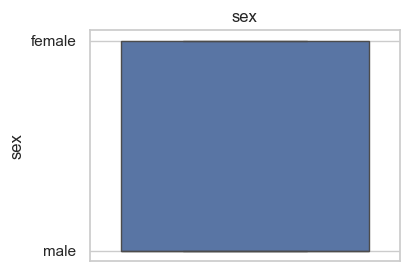

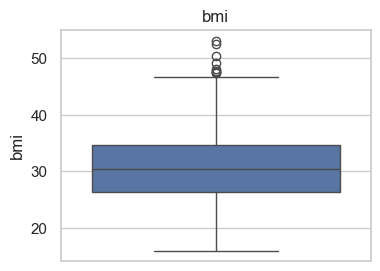

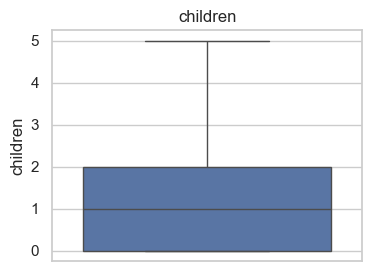

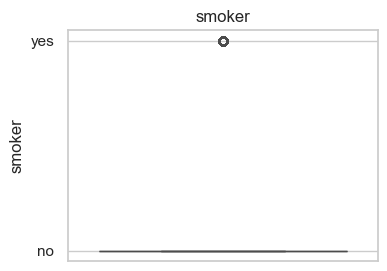

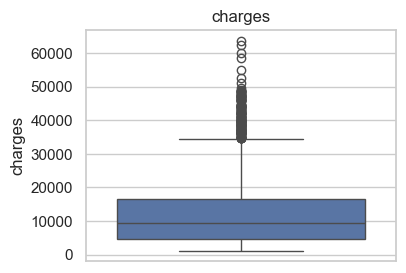

In [50]:
for col in num_cols:
    plt.figure(figsize=(4, 3))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()


In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1329 non-null   int64  
 1   sex       1329 non-null   int64  
 2   bmi       1329 non-null   float64
 3   children  1329 non-null   int64  
 4   smoker    1329 non-null   int64  
 5   region    1329 non-null   object 
 6   charges   1329 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.1+ KB


In [52]:
# using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric features
X = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Feature        VIF
0       age  11.885009
1       sex   1.985259
2       bmi  18.871949
3  children   1.832601
4    smoker  14.232797
5   charges   8.028644


* As we can see smoker is the most affecting feature but since we will work with the corr limit of greater than 0.8 to be out threshold for corr we will allow this column as the other columns have far too little correlation, albiet this makes the smoker column/ feature to highlight/ affect the charges but we can not deny or shrink a Binary feature column so we will proceed with it
* Since we have also identified the outliers and there amount and data is not something that affects (as per my point-of-view) the modelling that much with just 9 rows we will proceed with the removal of these outliers as per 5 number summary method
* As per VIF we found no feature to be of severe issue so we will proceed with all 5 columns as the independent variables and use them to predict the charges(dependent variable)

_____________________________________________________________________________
Albiet not encoded and completly ready to use we will proceed with the df_cleaned as the csv/ dataset we will work with, thus saving df_cleaned as a the main df moving forward

In [53]:
df_cleaned.to_csv('../data/insurance_no_outliers.csv',index=False)